### Import Libraries

In [28]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from tqdm import tqdm
import random


cwd = os.getcwd()

### Open Dataset and Data review

In [29]:
data_dir = os.path.join(cwd, 'data/')
data = pd.read_csv(os.path.join(data_dir, 'salary.csv'))
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [30]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [31]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Data preprocessing and Data cleaning

In [32]:
# declare utility functions
def normalized(dataset, colmun):
    dataset[colmun] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset[colmun].values.reshape(-1,1))
    return dataset

def onehot_encode(dataset, column):
    onehot = pd.get_dummies(dataset[column], prefix="{}_".format(column), prefix_sep="")
    dataset = pd.concat([dataset, onehot], axis=1)
    dataset = dataset.drop(column, axis=1)
    return dataset

def label_encode(dataset, column):
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    return dataset

def show_corr(dataset):
    corr = dataset.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
    plt.show()

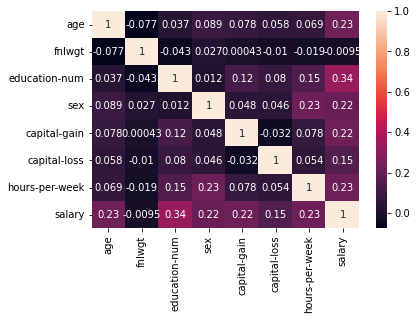

In [33]:
# numeric column processing
for i in ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]:
    data = normalized(data, i)

# binary field processing
for i in ["sex", "salary"]:
    data = label_encode(data, i)

show_corr(data)

# categorical column processing
for i in ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country"]:
    data = onehot_encode(data, i)

In [34]:
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.044302,0.800000,1,0.02174,0.0,0.397959,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.048238,0.800000,1,0.00000,0.0,0.122449,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.138113,0.533333,1,0.00000,0.0,0.397959,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.151068,0.400000,1,0.00000,0.0,0.397959,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.221488,0.800000,0,0.00000,0.0,0.397959,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data.dtypes

age                                float64
fnlwgt                             float64
education-num                      float64
sex                                  int32
capital-gain                       float64
                                    ...   
native-country_ Thailand             uint8
native-country_ Trinadad&Tobago      uint8
native-country_ United-States        uint8
native-country_ Vietnam              uint8
native-country_ Yugoslavia           uint8
Length: 108, dtype: object

### Split train/test set

In [36]:
target, feature = data['salary'], data.drop(columns=['salary'], axis=1)
print(f"normalized data shape: {data.shape}")
print(f"feature(x-axis) shape: {feature.shape}")
print(f"target(y-axis) shape: {target.shape}")

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.25, random_state=random.randint(0,100))

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

normalized data shape: (32561, 108)
feature(x-axis) shape: (32561, 107)
target(y-axis) shape: (32561,)
x_train shape: (24420, 107)
x_test shape: (8141, 107)
y_train shape: (24420,)
y_test shape: (8141,)


### Baseline classfication accuracy

In [37]:
# 此處使用 DummyClassifier 做為基準模型
# 將策略指定為 'most_frequent'
# 在這個策略下，模型總是回傳最頻繁出現的y-axis值
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(x_train, y_train)
baseAcc = dummy.score(x_test, y_test)
print(f"baseline Acc: {baseAcc}")

baseline Acc: 0.7578921508414199


### Model Traning!!

In [38]:
estimator_range = range(1, 101)

### Method 1: Bagging Classifier

100%|██████████| 100/100 [17:55<00:00, 10.75s/it]

[bagging] max score 0.8551774966220366 at 86


Text(0, 0.5, 'Accuracy')

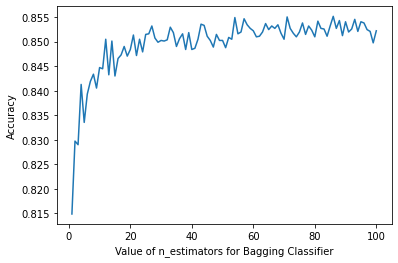

In [39]:
max_score_bag, max_k_bag = -1, -1

score_bag = []
for k in tqdm(estimator_range):
    bag = BaggingClassifier(n_estimators=k)
    bag.fit(x_train, y_train)
    score_bag.append(bag.score(x_test, y_test))
    if score_bag[-1] > max_score_bag:
        max_score_bag, max_k_bag = score_bag[-1], k

print(f"[bagging] max score {max_score_bag} at {max_k_bag}")

plt.plot(estimator_range, score_bag)
plt.xlabel('Value of n_estimators for Bagging Classifier')
plt.ylabel('Accuracy')

In [40]:
# using DecisionTreeClassifier as weak estimator
base_est1 = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=base_est1, n_estimators=max_k_bag, random_state=42)
bagging.fit(x_train, y_train)
bag_predict = bagging.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, bag_predict)}")

Accuracy: 0.8521066208082545


### Method 2: Random Forest Model

100%|██████████| 100/100 [03:24<00:00,  2.05s/it]

[Random Forest] max score 0.8554231666871391 at 28


Text(0, 0.5, 'Accuracy')

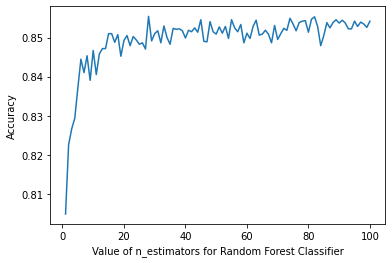

In [41]:
max_score_rfc, max_k_rfc = -1, -1

score_rfc = []
for k in tqdm(estimator_range):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    score_rfc.append(rfc.score(x_test, y_test))
    if score_rfc[-1] > max_score_rfc:
        max_score_rfc, max_k_rfc = score_rfc[-1], k

print(f"[Random Forest] max score {max_score_rfc} at {max_k_rfc}")

plt.plot(estimator_range, score_rfc)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Accuracy')

In [42]:
rfc = RandomForestClassifier(n_estimators=max_k_rfc, random_state=42)
rfc.fit(x_train, y_train)
rfc_predict = rfc.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, rfc_predict)}")

Accuracy: 0.8522294558408058


In [43]:
# find feature importance in RandomForestClassifier
feature_importance = pd.DataFrame(rfc.feature_importances_, index=feature.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.head(10)

,importance
fnlwgt,0.159343
age,0.149633
capital-gain,0.092638
hours-per-week,0.085057
marital-status_ Married-civ-spouse,0.059618
education-num,0.058037
relationship_ Husband,0.047973
capital-loss,0.029371
marital-status_ Never-married,0.025463
occupation_ Exec-managerial,0.018839


### Method 3: Ada Boost Model

100%|██████████| 100/100 [03:36<00:00,  2.16s/it]

[Ada Boost] max score 0.864881464193588 at 96


Text(0, 0.5, 'Accuracy')

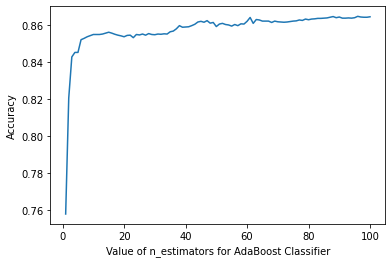

In [51]:
max_score_ada, max_k_ada = -1, -1

score_ada = []
for k in tqdm(estimator_range):
    ada = AdaBoostClassifier(n_estimators=k, random_state=42)
    ada.fit(x_train, y_train)
    score_ada.append(ada.score(x_test, y_test))
    if score_ada[-1] > max_score_ada:
        max_score_ada, max_k_ada = score_ada[-1], k

print(f"[Ada Boost] max score {max_score_ada} at {max_k_ada}")

plt.plot(estimator_range, score_ada)
plt.xlabel('Value of n_estimators for AdaBoost Classifier')
plt.ylabel('Accuracy')

In [59]:
# using DecisionTreeClassifier as weak estimator
ada = AdaBoostClassifier(n_estimators=max_k_ada, random_state=42)
ada.fit(x_train, y_train)
ada_predict = ada.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, ada_predict)}")

Accuracy: 0.864881464193588


### Make Classifier Together!

In [60]:
voting = VotingClassifier(estimators=[('bag', bagging),('rfc', rfc), ('ada', ada)], voting='hard')
voting.fit(x_train, y_train)
voting_predict = voting.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, voting_predict)}")

Accuracy: 0.8607050730868444
